## Language Identification Natural Language Processing Project

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import gensim.downloader as api

### Load data

In [4]:
data = pd.read_csv("Language Detection.csv")

In [5]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
data.shape

(10337, 2)

### Check counts of languages

In [7]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

### Visualize the language status in dataset

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Language', ylabel='count'>

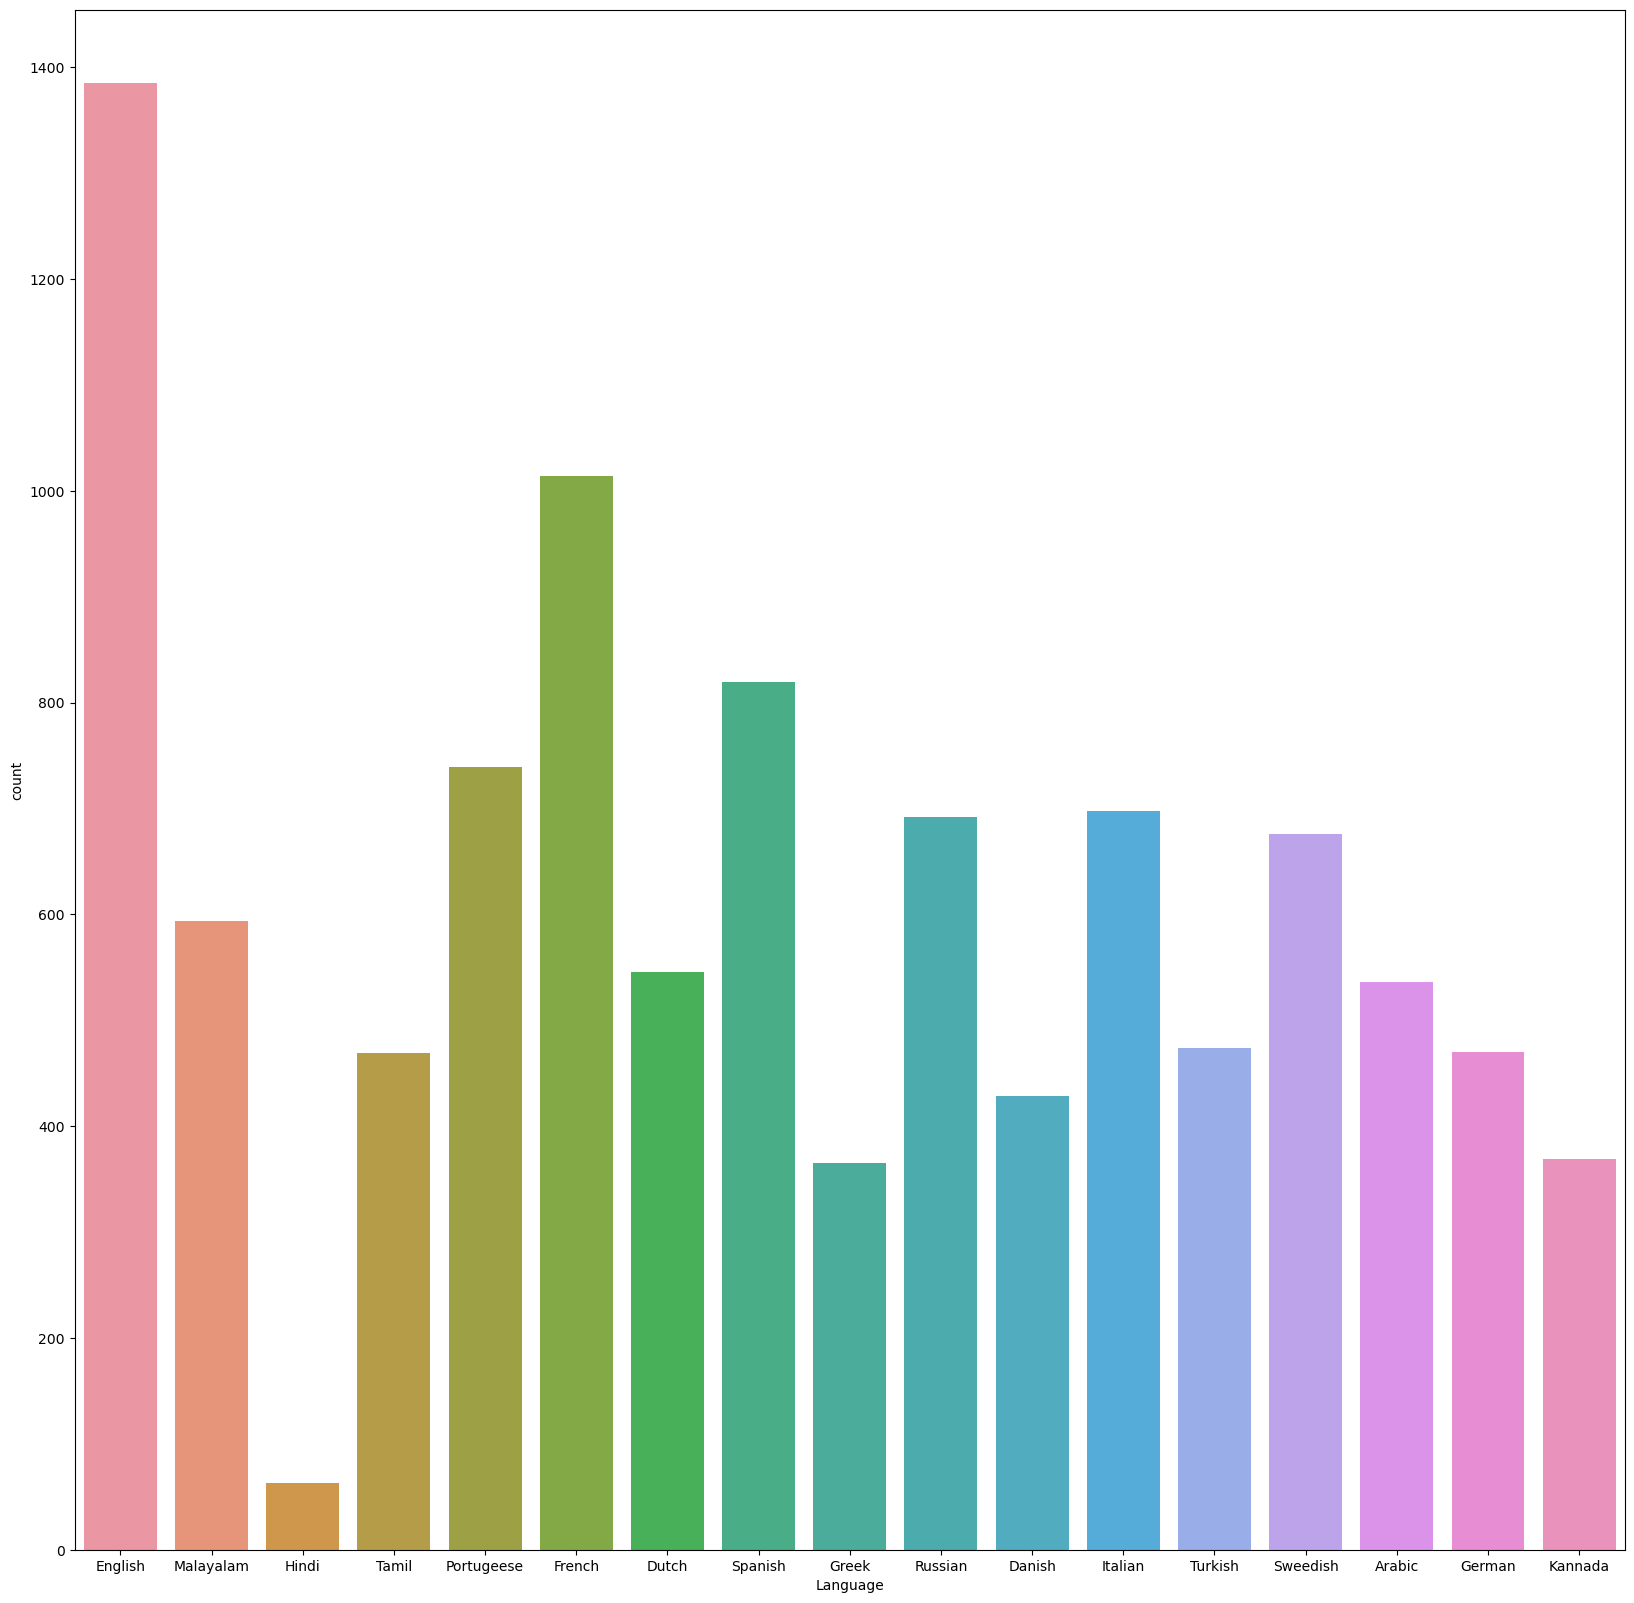

In [8]:
plt.figure(figsize=(20,20))
sns.countplot(data['Language'])

In [9]:
data['Text'][3]

'Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.'

### Remove stopwords from sentences

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [11]:
ps = PorterStemmer()
corpus = []
stop_words = set(stopwords.words())  # Move this outside the loop

for text in data['Text']:
    rev = re.sub("^[a-zA-Z]", ' ', text)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in stop_words]  # Check against the pre-built set
    rev = ' '.join(rev)
    corpus.append(rev)


### Load pre-trained word embeddings

In [12]:
# glove_model = api.load("glove-twitter-25")

### Convert sentences into vector

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

In [14]:
# X = []
# for text in corpus:
#     vectors = [glove_model[word] for word in text.split() if word in glove_model.key_to_index]
#     if vectors:
#         sentence_vector = np.mean(vectors, axis=0)
#     else:
#         sentence_vector = np.zeros(glove_model.vector_size)
#     X.append(sentence_vector)
    
# X = np.array(X)
            

In [15]:
X.shape

(10337, 10000)

### LabelEncoding (Convert language name into 1,2,3....etc)

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(data['Language'])

In [26]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [27]:
len(y)

10337

In [28]:
label.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

### Final data looks like

In [29]:
data1 = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])

In [30]:
data1

,Sentence,Language
0,"nature, broadest sense, natural, physical, mat...",3
1,"""nature"" refer phenomena physic world, life ge...",3
2,"studi natur large, only, part science.",3
3,"lthough human part nature, human activ underst...",3
4,[1] word natur borrow french natur deriv latin...,3
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,9
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,9
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,9
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,9


### Split data into training and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8269, 10000), (2068, 10000), (8269,), (2068,))

### Define model

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
classifier = MultinomialNB().fit(X_train,y_train)

### Test model on test data

In [35]:
pred = classifier.predict(X_test)

In [36]:
pred

array([13, 16, 12, ...,  3, 13,  5])

In [37]:
y_test

array([13, 16, 12, ...,  3, 13,  5])

### Evaluate

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9274661508704062
[[109   0   0   8   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  64   0   9   0   1   0   0   0   0   0   0   0   0   3   0   0]
 [  0   2  92   8   0   0   0   0   0   0   0   1   0   0   3   0   0]
 [  0   2   0 256   0   0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   0   1   5 188   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   1   2   7   1  93   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   6   0   0  64   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   1   0   0   0 142   0   0   1   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0  72   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   4   1   0   0   0   4   0   0 137   0   4   0   0   0]
 [  0   0   0   9   0   0   0   0   0   0   0   0 133   0   0   0   0]
 [  0   0   0  12   0   0   0   0   0   0   0   3   0 143 

In [41]:
from sklearn.metrics import precision_score, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, pred, average='weighted')
print("Precision:", precision)


Accuracy: 0.9274661508704062
Precision: 0.941939031500181


### Confusion matrix

<AxesSubplot:>

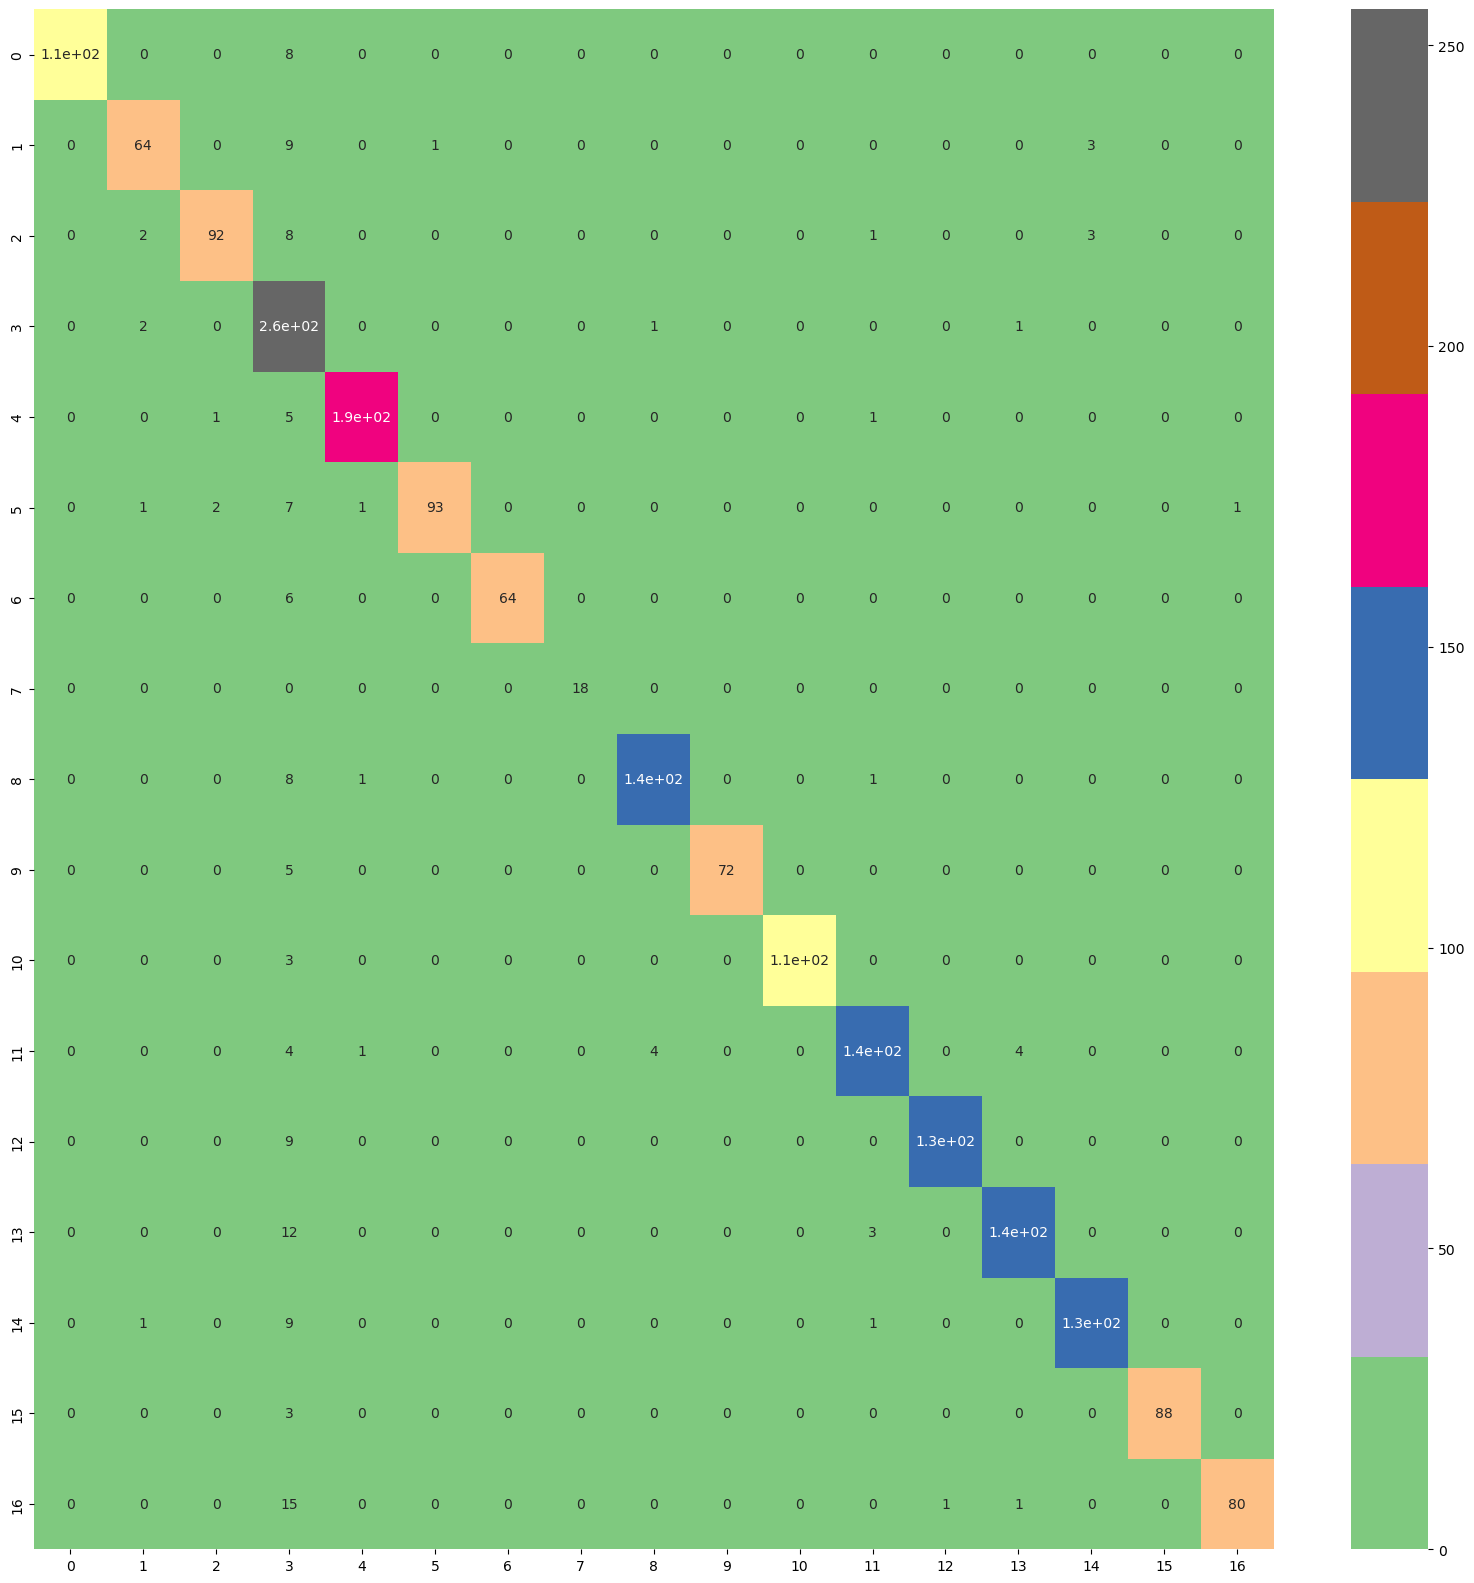

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

### Actual Language and Predicted Language

In [43]:
fnl = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
fnl

,Actual,Predicted
0,13,13
1,16,16
2,12,12
3,3,3
4,3,3
...,...,...
2063,12,12
2064,15,15
2065,3,3
2066,13,13


### Save model

In [44]:
import joblib
joblib.dump(classifier,'language_identification.sav')

['language_identification.sav']

### Load model

In [45]:
model = joblib.load('language_identification.sav')

### Test model

In [46]:
def test_model(test_sentence):
    languages = {
        'Arabic':0,
        'Danish':1,
        'Dutch':2,
        'English':3,
        'French':4,
        'German':5,
        'Greek':6,
        'Hindi':7,
        'Italian':8,
        'Kannada':9,
        'Malayalam':10,
        'Portugeese':11,
        'Russian':12,
        'Spanish':13,
        'Sweedish':14,
        'Tamil':15,
        'Turkish':16,
    }
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    output = model.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    print(output)

In [51]:
# test_model('Tere kuidas sul laheb') #English => Correct

In [52]:
test_model('Tere kuidas sul laheb')

English


In [53]:
test_model('kaha jaoge jii aap')

English


In [54]:
test_model('ನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ')

Kannada


In [55]:
pd.DataFrame(np.c_[data['Text'],data['Language'],y],columns=['Sentence','Language','Encoded'])

,Sentence,Language,Encoded
0,"Nature, in the broadest sense, is the natural...",English,3
1,"""Nature"" can refer to the phenomena of the phy...",English,3
2,"The study of nature is a large, if not the onl...",English,3
3,"Although humans are part of nature, human acti...",English,3
4,[1] The word nature is borrowed from the Old F...,English,3
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,9
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,9
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,9
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,9


### ThankYou